<a href="https://colab.research.google.com/github/RafsanJany-44/Research-NREM-REM/blob/main/Tunning_GRAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/REM_NREM.csv")

In [2]:
dataset.head()

,Sleep_Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,NREM,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,25.35024,27.47317,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,NREM,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,25.22537,26.97366,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,NREM,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,26.09951,28.47220,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,NREM,0.00050,10.36488,16.60878,15.85951,7.99220,0.00053,15.48488,24.10146,25.72488,...,0.00130,1.87317,6.11902,3.74634,0.37463,0.000070,31.59415,42.83317,49.95122,49.95122
4,NREM,0.00072,9.36585,15.98439,15.48488,7.99220,0.00067,15.11024,22.22829,23.22732,...,0.00123,1.49854,6.61854,3.74634,0.74927,0.000060,29.47122,45.08098,49.95122,49.95122


In [3]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

classifier = GradientBoostingClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[13882   578]
 [ 1392  1968]]
              precision    recall  f1-score   support

        NREM       0.91      0.96      0.93     14460
         REM       0.77      0.59      0.67      3360

    accuracy                           0.89     17820
   macro avg       0.84      0.77      0.80     17820
weighted avg       0.88      0.89      0.88     17820

Accurecy:  0.8894500561167228


1/50 round completed......................... Accurecy: 0.8114478114478114
2/50 round completed......................... Accurecy: 0.8114478114478114
3/50 round completed......................... Accurecy: 0.8114478114478114
4/50 round completed......................... Accurecy: 0.8114478114478114
5/50 round completed......................... Accurecy: 0.8114478114478114
6/50 round completed......................... Accurecy: 0.8114478114478114
7/50 round completed......................... Accurecy: 0.8114478114478114
8/50 round completed......................... Accurecy: 0.8199775533108866
9/50 round completed......................... Accurecy: 0.8268237934904602
10/50 round completed......................... Accurecy: 0.8305836139169472
11/50 round completed......................... Accurecy: 0.8335016835016835
12/50 round completed......................... Accurecy: 0.8359708193041526
13/50 round completed......................... Accurecy: 0.8388327721661055
14/50 round completed

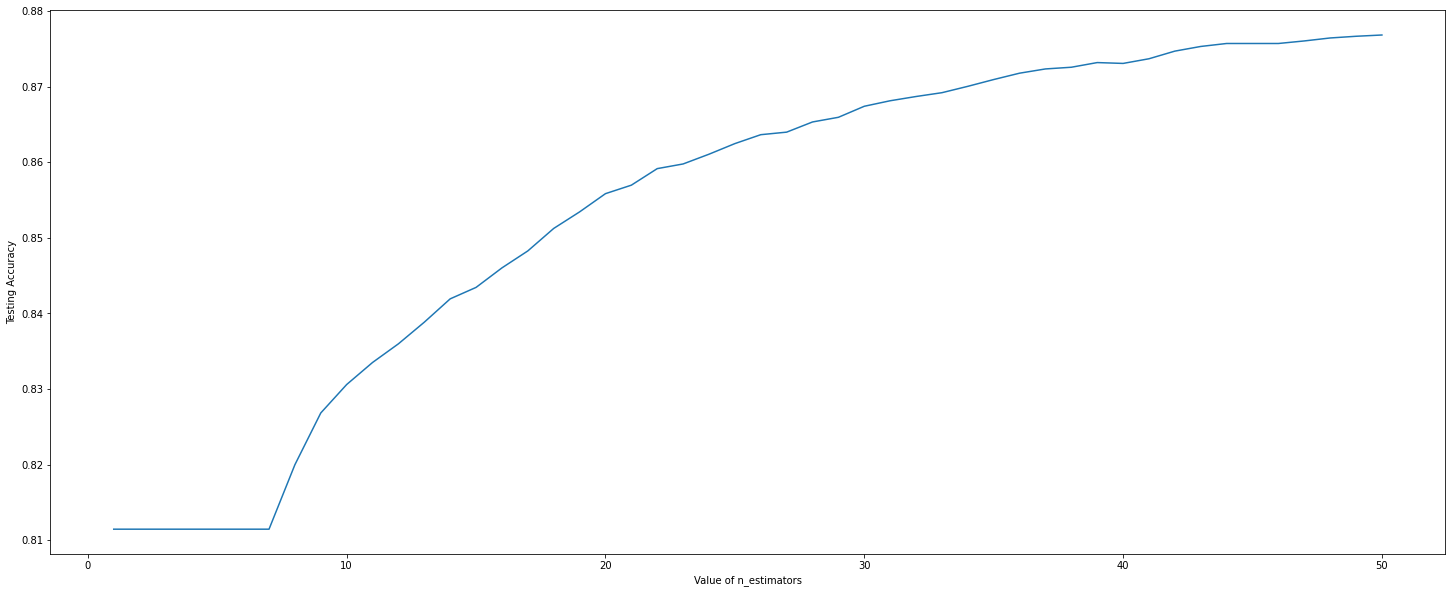

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/20 round completed......................... Accurecy: 0.8539281705948373
2/20 round completed......................... Accurecy: 0.87665544332211
3/20 round completed......................... Accurecy: 0.8894500561167228
4/20 round completed......................... Accurecy: 0.9017957351290684
5/20 round completed......................... Accurecy: 0.913973063973064
6/20 round completed......................... Accurecy: 0.9232323232323232
7/20 round completed......................... Accurecy: 0.9257014590347924
8/20 round completed......................... Accurecy: 0.931705948372615
9/20 round completed......................... Accurecy: 0.9332210998877666
10/20 round completed......................... Accurecy: 0.9351290684624018
11/20 round completed......................... Accurecy: 0.9361952861952862
12/20 round completed......................... Accurecy: 0.936026936026936
13/20 round completed......................... Accurecy: 0.9356902356902357
14/20 round completed.....

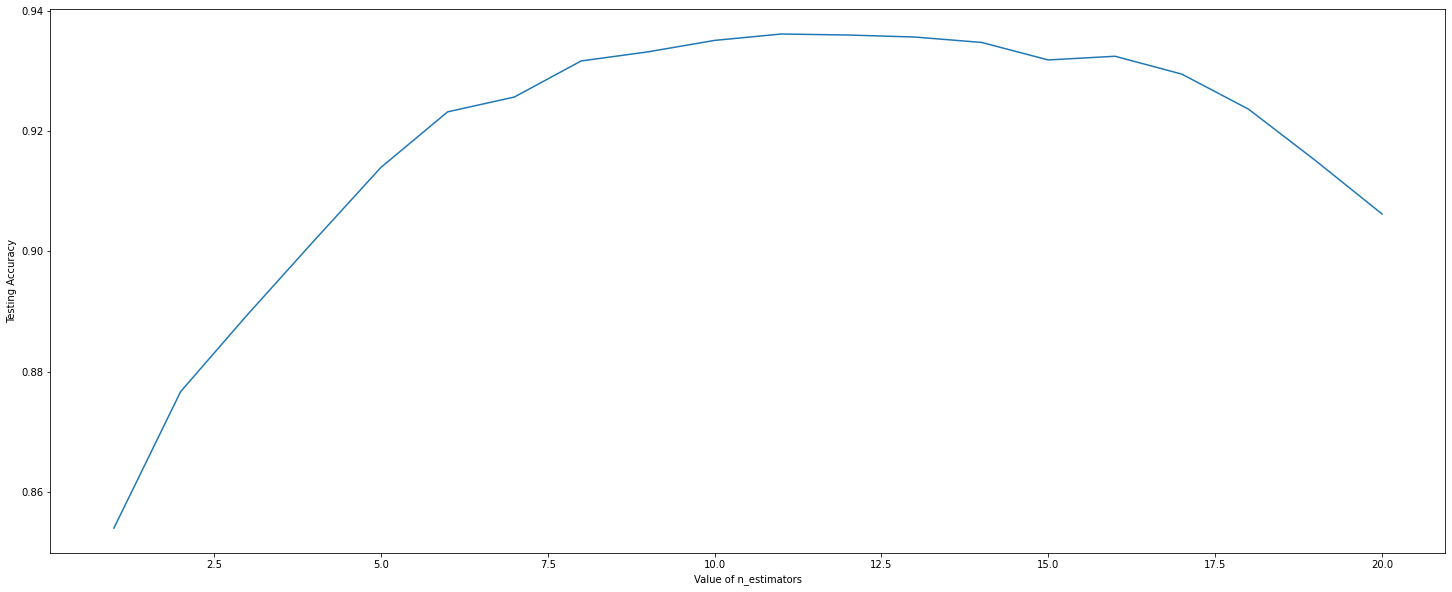

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=20
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[14379    81]
 [ 2886   474]]
              precision    recall  f1-score   support

        NREM       0.83      0.99      0.91     14460
         REM       0.85      0.14      0.24      3360

    accuracy                           0.83     17820
   macro avg       0.84      0.57      0.57     17820
weighted avg       0.84      0.83      0.78     17820

Accurecy:  0.8335016835016835


In [10]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[14102   358]
 [  779  2581]]
              precision    recall  f1-score   support

        NREM       0.95      0.98      0.96     14460
         REM       0.88      0.77      0.82      3360

    accuracy                           0.94     17820
   macro avg       0.91      0.87      0.89     17820
weighted avg       0.93      0.94      0.93     17820

Accurecy:  0.9361952861952862
